In [ ]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

Library verification

In [13]:
packs = [ 'matplotlib.pyplot', 'pandas', 'csv','numpy']

def verificar_pack(pack):
    try:
        importlib.import_module(pack)
        return True
    except ImportError:
        return False

for pack in packs:
    if verificar_pack(pack):
        print(f'O pacote "{pack}" está instalado.')
    else:
        print(f'O pacote "{pack}" não está instalado.')
        

O pacote "matplotlib.pyplot" está instalado.
O pacote "pandas" está instalado.
O pacote "csv" está instalado.
O pacote "numpy" está instalado.


#II- Data wrangling: Used 'pandas' library to execute data cleaning process

Itens A-E 

In [9]:
raw_data = 'production_data.csv'
df = pd.read_csv(raw_data)

#Rename and keep the first 4 columns

df = df[['prfInformationCarrier', 'prfYear', 'prfMonth', 'prfPrdOilNetMillSm3']]
df.columns = ['Field', 'Year', 'Month', 'Net - Oil']

#Timeframe and company data selection

df = df[(df['Field'].isin(['EKOFISK', 'ELDFISK', 'EMBLA']))
        & (df['Year'] >= 2013) & (df['Month'] >= 1)]

#The marvelous Ekofish area

drop_other_rows = df.drop(df.index.difference(df[(df['Field'].isin(['EKOFISK', 'ELDFISK', 'EMBLA'])) & (df['Year']>= 2013)
                                                 & (df['Month'] >= 1)].index), inplace=True)

#Numerical date column

df['Date'] = pd.to_datetime(df['Month'].astype(str).str.zfill(2) + df['Year'].astype(str), format='%m%Y')

Added def functions to convertions and averages calculations for topics f. g. and h.

In [10]:
#Manager convertion function

def convert_production_data(df):
    df['barrels'] = df['Net - Oil'] * 1000000
    df['Production_TBPD'] = df['barrels'] / (24 * 3600)
    #Global conversion factor
    df['Production_TBPD'] *= 0.812
    df.drop(['Net - Oil','barrels'], axis=1, inplace=True)
convert_production_data(df)

#Sweet colleague monthly mean function

def average_calculations(df):
    yearly_average = df.groupby('Year')['Production_TBPD'].transform('mean')
    df['Yearly_average'] = yearly_average
    df['Monthly_Deviation'] = df['Production_TBPD'] - yearly_average
average_calculations(df)

#BD Manager 6-month moving average

def rolling_average(df):
    df['Production_MA'] = df['Production_TBPD'].rolling(window=6).mean()
    df['Production_MA'].fillna(0, inplace=True)
rolling_average(df)

Final CSV file and download

In [11]:
variables_to_present = ['Date','Field','Production_TBPD','Yearly_average','Monthly_Deviation','Production_MA']
final_df = df[variables_to_present]

final_df.to_csv('final_data.csv', index=False)
print('Final Data Downloaded as CSV')

print(final_df)

Final Data Downloaded as CSV
           Date    Field  Production_TBPD  Yearly_average  Monthly_Deviation  \
3350 2013-01-01  EKOFISK         5.621502        2.205315           3.416188   
3351 2013-02-01  EKOFISK         4.883560        2.205315           2.678245   
3352 2013-03-01  EKOFISK         5.358448        2.205315           3.153134   
3353 2013-04-01  EKOFISK         5.093138        2.205315           2.887824   
3354 2013-05-01  EKOFISK         5.354313        2.205315           3.148998   
...         ...      ...              ...             ...                ...   
4360 2023-02-01    EMBLA         0.168979        1.706286          -1.537307   
4361 2023-03-01    EMBLA         0.142946        1.706286          -1.563340   
4362 2023-04-01    EMBLA         0.175369        1.706286          -1.530917   
4363 2023-05-01    EMBLA         0.168509        1.706286          -1.537777   
4364 2023-06-01    EMBLA         0.120484        1.706286          -1.585802   

      Prod

Data Visualization 'pyplot' used for graphs

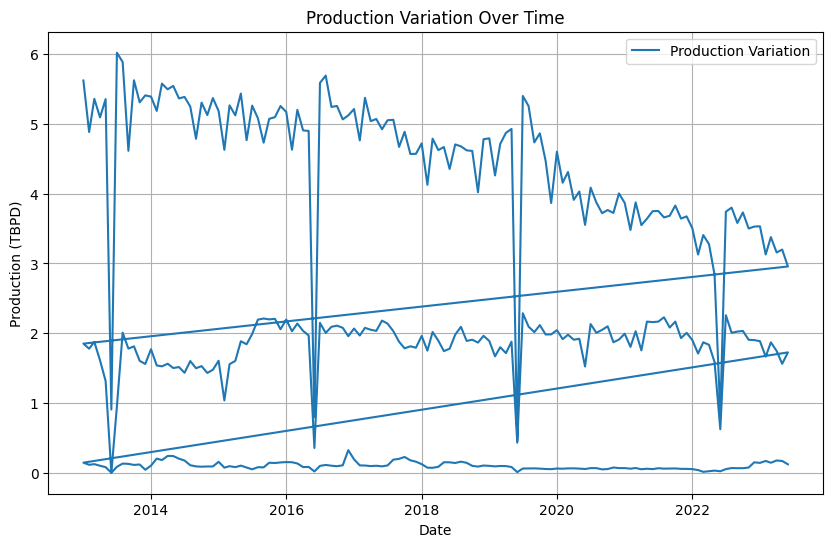

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(final_df['Date'], final_df['Production_TBPD'], label='Production Variation', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Production (TBPD)')
plt.title('Production Variation Over Time')
plt.legend()
plt.grid(True)
plt.show()